# Workfile N°1 : Data import and tools for A2A's value analysis

## Executive Summary 

- [0)](#prel) Preliminary tasks: modules importing and function definition. 


- [1)](#imports) Imports from Yahoo finance data provider.


- [2)](#imports2) Imports from Investing.com : how to solve several problems. 


- [3)](#imports3) A ready-to-use function to import data time series from Investing.com 


### Preliminary imports to allow our data-analysis: <a name = "prel"></a> 

In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 

%matplotlib inline 


The following task is to use easily yahoo finance time series:

In [2]:
import yfinance as yf 

In [3]:
import json 


The following function will be used to remove not more necessary files. 

In [4]:
def removeFile(fileName):
    """
    removeFile(fileName) function remove file 'fileName', if it exists. It also prints on screen a success/failure message.
    
    Parameters:
        fileName (str): name of the file ('Data' folder is assumed)
        
    Returns:
        None
    """

    if os.path.isfile(os.path.join(dataFolderPath, fileName)):
        os.remove(os.path.join(dataFolderPath, fileName))

        # double-check if file still exists
        fileStillExists = os.path.isfile(os.path.join(dataFolderPath, fileName))

        if fileStillExists:
            print("Failure: file {} still exists...".format(fileName))
        else:
            print("Success: file {} successfully removed!".format(fileName))
            
    else:
        print("File {} already removed.".format(fileName))

### - How to approach with yahoo finance data set importing: <a name = "imports"></a> 

First of all we should ensure ourselves to have the correct path for Data-Folder

In [ ]:
dataFolderPath = "./data"


In [ ]:
if not os.path.exists(dataFolderPath):
    os.makedirs(dataFolderPath)

In [ ]:
os.path.exists(dataFolderPath)

Here the "Tickers" associated by YF to our assets of interest: 

In [5]:
a2a = yf.Ticker("A2A.MI")
ftse = yf.Ticker("FTSEMIB.MI")

### Problems we have faced until now: 

 

**1)** A2A ticker doesn't have a working .info method, anyway we can extract time series using the following workaround:

**[Remark]** For awareness I demonstrate the template to get a proper file in our remote machine according to I/O operations, in .json format. 

In [ ]:
#filePath = os.path.join(dataFolderPath, "ftseMib.json")
pathFile = os.path.join(dataFolderPath, "a2a.json")

In [ ]:
downloadData = True  

In [ ]:
"""
 if downloadData: 
    
    ftse_info = ftse.info 
    a2a_history = a2a.history 
    with open(filePath ,'w') as file: 
        json.dump(ftse_info,file)
    
    with open(pathFile, 'w') as file_two:
        json.dump(a2a_history,file_two)
    
    downloadData = False
    
 else: 
   
    with open(filePath, 'r') as file: 
        ftse_info = json.load(file)
  
""""

In [ ]:
#removeFile(pathFile)

Given the provider problem we can anyway try to use the following method to create a Pandas DataFrame with price, volumes ecc time series: 

In [6]:
a2a_history =a2a.history(period = "max", interval ="1wk")

In [7]:
a2a_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,1.9766,2.0353,1.6537,1.8885,40860000.0,0.0,0
2000-01-10,1.9423,1.9423,1.7662,1.9326,30296000.0,0.0,0
2000-01-17,1.9326,1.9472,1.8102,1.8494,37283000.0,0.0,0
2000-01-24,1.8494,2.2848,1.8005,2.1380,65382000.0,0.0,0
2000-01-31,2.0842,2.3582,2.0549,2.3044,50591000.0,0.0,0
...,...,...,...,...,...,...,...
2020-04-06,1.1735,1.2450,1.1555,1.2025,62164737.0,0.0,0
2020-04-13,1.2025,1.2600,1.2005,1.2495,62278404.0,0.0,0
2020-04-20,1.2580,1.2695,1.1930,1.2210,53375910.0,0.0,0


In [8]:
type(a2a_history)

pandas.core.frame.DataFrame

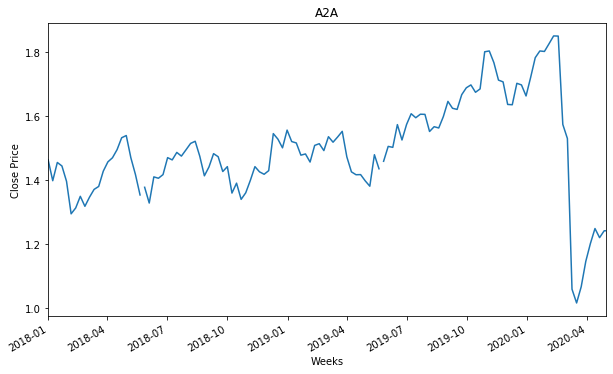

In [9]:
ax = a2a_history.loc['2018-01-01':, "Close"].plot(figsize=(10,6))

ax.set_title("A2A")
ax.set_ylabel("Close Price")
ax.set_xlabel("Weeks")

ax


From the above plotting it's clearly evident the drop due to Coronavirus outbreak. 

--- 

**2)** Ftse Mib index does show a strange pattern according to yahoo finance. 

Indeed, the provider has not updated the series since 2018 generating a relevant lack of information. 


In [ ]:
#ax = ftseMib_history.loc["2018-01-01":,"Close"].plot(figsize=(10,6))
#ax.set_title("FTSE MIB ITALIA")
#ax.set_ylabel("Close Price")
#ax

### - How to import from Investing.com and solve several related problems  <a name="imports2"></a>

A possible way to avoid this issue is to adopt another data provider such as Investing.com

In [13]:
dataPath = "C:/Users/simon/OneDrive/Desktop/Corporate-valuation-/Notebook/Data set"

In [14]:
filePath = os.path.join(dataPath, "ftsemib.csv")

Unfortunately, Investor allows us to download time series of traded stock but at a cost: they are presentend in .csv format as a dataframe of strings.

In [15]:
df_Ftse = pd.read_csv(filePath, index_col=0)
df_Ftse

,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
27.04.2020,"17.380,21","17.313,48","17.380,21","17.163,85","307,77M","3,09%"
24.04.2020,"16.858,89","16.640,17","17.155,11","16.640,17","349,28M","-0,89%"
23.04.2020,"17.011,11","16.925,36","17.145,44","16.778,15","392,98M","1,47%"
22.04.2020,"16.765,28","16.615,00","16.770,44","16.555,34","347,50M","1,91%"
21.04.2020,"16.450,85","16.811,87","16.934,52","16.450,85","401,99M","-3,59%"
...,...,...,...,...,...,...
07.01.2015,"18.123,45","18.226,43","18.478,11","17.991,76","752,62M","-0,11%"
06.01.2015,"18.143,26","18.298,26","18.523,74","18.041,32","703,94M","-0,25%"
05.01.2015,"18.188,44","18.961,03","19.190,24","18.188,44","836,17M","-4,92%"


#### List of problems with Investing's time series <a name="here"></a>

**0)** From date index we must convert into an American convention: days with months and viceversa. _(This approach not always is compulsory, anyway we integrate it into the function)_

**1)** All the elements are strings: we must convert date indices in a DateTime object and the other values in float data type.

**2)** Figures are expressed in European convention: we must invert points with commas to express decimal part and remove points used for thousands. 

**3)** Finally, we must revert the order of dates: from the furthest to the most recent. 

In [22]:
print(df_Ftse["Ultimo"][0])
type(df_Ftse["Ultimo"][0])

17.380,21


str

the same as 

In [23]:
print(df_Ftse.iloc[0,0])
type(df_Ftse.iloc[0,0])

17.380,21


str

The following functions try to solve problems presented from n°1 to n°3: 

In [28]:
def modifyInvesting(dataFrame):
  
    """"
    With this function I remove points and convert commas into points for every dataframe column. Thereafter I convert strings
    to float data type for each element in columns. 
    This is a correction needed to import dataframes from Investing csv's. 
    
    modifyInvesting(dataFrame) function first of all converts respectively "." to " " and "," to "." in dataFrames according to American convention. 
    Then it transform each value in each column from strings to float data type. 
    
    Parameter: 
        (dataFrame): dataFrame data structure I imported from Investing.com, each element is a string. 
         
    Results:
        (dataFrame): the same data frame with values converted to make data analysis.  
    """
   
    for col in dataFrame:
        
        for i in range(len(dataFrame[col])):
            
            dataFrame[col][i] =  dataFrame[col][i].replace('.','').replace(',','.')
            
    
    for col in dataFrame:
            
        dataFrame[col] = dataFrame[col].astype(float)
   


    dataFrame = dataFrame.iloc[::-1]

        
    return dataFrame

In [54]:
def modInvesting(dataFrame): 

    """
    With this function I remove points and convert commas into points for every dataframe column. Thereafter I convert strings
    to float data type for each element in columns. 
    This is a correction needed to import dataframes from Investing csv's. 
    This is a leaner alternative to previous function, more compact but equally efficient.
    
    modInvesting(dataFrame) function first of all converts respectively "." to " " and "," to "." in dataFrames according to American convention. 
    Then it transform each value in each column from strings to float data type. 
    
    Parameter: 
        (dataFrame): dataFrame data structure I imported from Investing.com, each element is a string. 
         
    Results:
        (dataFrame): the same data frame with values converted to make data analysis.  
    """
    
#With the following command I apply the function lambda to replace points with white bars to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(".", ""))
    
#With the following command I apply the function lambda to replace commas with points to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(",", "."))
    
#With the following command I apply the function lambda to convert in a numeric format all strings values in each column
    
    dataFrame = dataFrame.apply(pd.to_numeric)
    
#Finally, I can revert the order of rows in dataFrame object
    
    dataFrame = dataFrame.iloc[::-1,::]
    
    
    return dataFrame
    



In [24]:
df_FtseNew = df_Ftse[['Ultimo','Apertura','Massimo','Minimo']]
df_FtseNew

,Ultimo,Apertura,Massimo,Minimo
2020-04-27,"17.380,21","17.313,48","17.380,21","17.163,85"
2020-04-24,"16.858,89","16.640,17","17.155,11","16.640,17"
2020-04-23,"17.011,11","16.925,36","17.145,44","16.778,15"
2020-04-22,"16.765,28","16.615,00","16.770,44","16.555,34"
2020-04-21,"16.450,85","16.811,87","16.934,52","16.450,85"
...,...,...,...,...
2015-01-07,"18.123,45","18.226,43","18.478,11","17.991,76"
2015-01-06,"18.143,26","18.298,26","18.523,74","18.041,32"
2015-01-05,"18.188,44","18.961,03","19.190,24","18.188,44"
2015-01-04,"19.130,26","19.130,26","19.130,26","19.130,26"


In [25]:
df_FtseNew["Ultimo"]

2020-04-27    17.380,21
2020-04-24    16.858,89
2020-04-23    17.011,11
2020-04-22    16.765,28
2020-04-21    16.450,85
                ...    
2015-01-07    18.123,45
2015-01-06    18.143,26
2015-01-05    18.188,44
2015-01-04    19.130,26
2015-01-02    19.130,26
Name: Ultimo, Length: 1350, dtype: object

In [30]:
df_FtseMib = modInvesting(df_FtseNew) #I call the function and execute the change 



In [31]:
df_FtseMib #The result of conversion 

,Ultimo,Apertura,Massimo,Minimo
2015-01-02,19130.26,19156.72,19246.76,18919.65
2015-01-04,19130.26,19130.26,19130.26,19130.26
2015-01-05,18188.44,18961.03,19190.24,18188.44
2015-01-06,18143.26,18298.26,18523.74,18041.32
2015-01-07,18123.45,18226.43,18478.11,17991.76
...,...,...,...,...
2020-04-21,16450.85,16811.87,16934.52,16450.85
2020-04-22,16765.28,16615.00,16770.44,16555.34
2020-04-23,17011.11,16925.36,17145.44,16778.15
2020-04-24,16858.89,16640.17,17155.11,16640.17


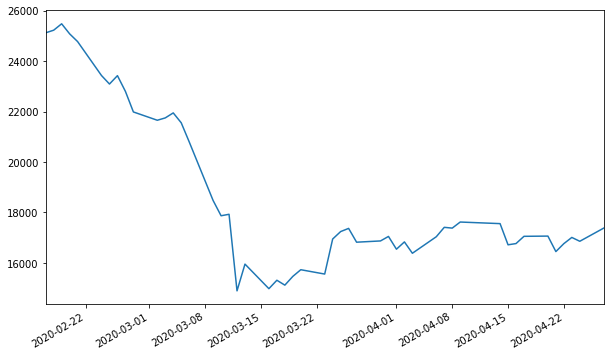

In [32]:
#Now I can plot it 

df_FtseMib.loc['2020-02-15': , "Ultimo"].plot(figsize=(10,6))

#### All previous problems solved with one function

The following function catches previous results in order to create a simple tool we will use in the future to solve [all problems](#here) related with importing time series from Investing.com data provider. 

In [32]:
def modInvestingComplete(dataFrame): 
   
    import datetime as dt # It can be omitted if preliminary imported
    
    """
    This function  starts modifying the DataFrame index composed by strings starting from element's aspetct 
    (converting dots to minus) and then modifying their order into convention "Y-M-D". Finally, it converts the list into a 
    dateTime object wich will replace the previous index. 
    All in order to have a correct index composed by dates which can be passed to get every useful result. 
     
    
    Then it passes to dataFrame elements removing points and converting commas into points for every dataframe column.
    Thereafter it converts strings to float data type for each element in columns. 
    This is a correction needed to import dataframes from Investing csv's. 
    This is a leaner alternative to previous function, more compact but equally efficient.
    
    modInvesting(dataFrame) function first of all converts index into a list data type,  respectively "." to " " and "," to "." in dataFrames according to American convention. 
    Then it transform each value in each column from strings to float data type. 
    
    Parameter: 
        (dataFrame): dataFrame data structure I imported from Investing.com, each element is a string. 
         
    Results:
        (dataFrame): the same data frame with values converted to make data analysis.  
    """




    strDates = dataFrame.index.tolist()
    
    for i in range(len(strDates)):
        strDates[i] = strDates[i].replace('.','-')
            
    dates = [dt.datetime.strptime(strDates[i], "%d-%m-%Y") for i in range(len(strDates))]
    
    newStrDates = [dt.datetime.strftime(dates[i], "%Y-%m-%d") for i in range (len(dates))]
    
    newDates = [dt.datetime.strptime(newStrDates[i], "%Y-%m-%d") for i in range(len(newStrDates))]

    dataFrame.index = newDates
    
    
    
#With the following command I apply the function lambda to replace points with white bars to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(".", ""))
    
#With the following command I apply the function lambda to replace commas with points to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(",", "."))
    
#With the following command I apply the function lambda to convert in a numeric format all strings values in each column
    
    dataFrame = dataFrame.apply(pd.to_numeric)
    
#Finally, I can revert the order of rows in dataFrame object
    
    dataFrame = dataFrame.iloc[::-1,::]
    
    
    
    return  dataFrame
    



Once I have created what is needed, I can serialize it into a csv file and then remove the "junk" file I worked on. 

In [ ]:
pathFile = os.path.join(dataPath, "adj_ftsemib.csv")

In [ ]:
df_FtseMib.to_csv(path_or_buf = pathFile)

In [ ]:
removeFile(filePath)

## 3) Ready to use function to import time series from Investing.com <a name="import3"></a>

Let's now define a function in order to solve all previous problems related to reorganization and selection of columns. The purpose is to simplify all the procedures without repeating code lines. 

We will also implement the feature of direct log returns computation, avoiding some useless steps. 



In [142]:
def investingSeries(dataFrame,col,beg,end,logret,freq): 
   
    import datetime as dt # It can be omitted if preliminary imported
    
    """
    This function  starts modifying the DataFrame index composed by strings starting from element's aspetct 
    (converting dots to minus) and then modifying their order into convention "Y-M-D". Finally, it converts the list into a 
    dateTime object wich will replace the previous index. 
    All in order to have a correct index composed by dates which can be passed to get every useful result. 
     
    
    Then it passes to dataFrame elements removing points and converting commas into points for every dataframe column.
    Thereafter it converts strings to float data type for each element in columns. 
    This is a correction needed to import dataframes from Investing csv's. 
    This is a leaner alternative to previous function, more compact but equally efficient.
    
    modInvesting(dataFrame) function first of all converts index into a list data type,  respectively "." to " " and "," to "." in dataFrames according to American convention. 
    Then it transform each value in each column from strings to float data type. 
    
    Parameter: 
        (dataFrame): dataFrame data structure I imported from Investing.com, each element is a string. 
         
    Results:
        (dataFrame): the same data frame with values converted to make data analysis.  
    """

        

    
    
    if  "Vol." in dataFrame.columns:
        del dataFrame["Vol."]
            
    if "Var. %" in dataFrame.columns:
        del dataFrame["Var. %"]
    
    


    strDates = dataFrame.index.tolist()
    
    for i in range(len(strDates)):
        strDates[i] = strDates[i].replace('.','-')
            
    dates = [dt.datetime.strptime(strDates[i], "%d-%m-%Y") for i in range(len(strDates))]
    
    newStrDates = [dt.datetime.strftime(dates[i], "%Y-%m-%d") for i in range (len(dates))]
    
    newDates = [dt.datetime.strptime(newStrDates[i], "%Y-%m-%d") for i in range(len(newStrDates))]

    dataFrame.index = newDates
    
    
    
#With the following command I apply the function lambda to replace points with white bars to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(".", ""))
    
#With the following command I apply the function lambda to replace commas with points to all elements of each column
    
    dataFrame = dataFrame.apply(lambda x: x.str.replace(",", "."))
    
#With the following command I apply the function lambda to convert in a numeric format all strings values in each column
    
    dataFrame = dataFrame.apply(pd.to_numeric)
    
#Finally, I can revert the order of rows in dataFrame object
    
    dataFrame = dataFrame.iloc[::-1,::]
    
    dataFrame = dataFrame.loc[beg : end ,col]
    
    if logret: 
        
        if freq == "1w":
            
            df_tm1 = dataFrame.shift(periods = 1, freq ="1w")
            
            dflogRet = np.log(dataFrame) - np.log(df_tm1)
            
            
            
        elif freq == "5B":
            
            
            df_tm1 = dataFrame.shift(periods = 1, freq ="5B")
            
            dflogRet = np.log(dataFrame) - np.log(df_tm1)
            
          
            
        else: 
            
            df_tm1 = dataFrame.shift(periods = 1, freq ="1B")
            
            dflogRet = np.log(dataFrame) - np.log(df_tm1)
            
            
            
            
        return dflogRet.dropna()
    
    else: 
        
        return dataFrame
            
        

In [16]:
dataPath = "./Data set/Dataset for risk"

In [147]:
filePath = os.path.join(dataPath, "Euro Stoxx 50 weekly past 10 y dirty.csv")

In [148]:
test = pd.read_csv(filePath,index_col=0)

In [149]:
test

,Ultimo,Apertura,Massimo,Minimo,Vol.,Var. %
Data,,,,,,
01.03.2020,"3.232,07","3.355,33","3.448,24","3.216,44","394,04M","-2,93%"
23.02.2020,"3.329,49","3.762,35","3.762,35","3.283,18","424,44M","-12,39%"
16.02.2020,"3.800,38","3.843,10","3.867,28","3.776,82","207,41M","-1,06%"
09.02.2020,"3.840,97","3.794,18","3.854,43","3.779,10","177,97M","1,12%"
02.02.2020,"3.798,49","3.646,86","3.808,74","3.641,84","226,40M","4,33%"
...,...,...,...,...,...,...
31.01.2010,"2.631,64","2.763,88","2.842,61","2.631,64","642,07M","-5,23%"
24.01.2010,"2.776,83","2.825,15","2.845,15","2.737,33","506,43M","-2,11%"
17.01.2010,"2.836,80","2.949,94","2.990,50","2.806,51","458,00M","-3,52%"


In [150]:
new_df= investingSeries(test,"Ultimo","2010-02-15","2020-02-17" ,True,'1w')


In [151]:
new_df

2010-02-28    0.053160
2010-03-07    0.007244
2010-03-14   -0.000141
2010-03-21    0.014726
2010-03-28    0.012691
                ...   
2020-01-19   -0.007671
2020-01-26   -0.037268
2020-02-02    0.042370
2020-02-09    0.011121
2020-02-16   -0.010624
Name: Ultimo, Length: 521, dtype: float64

**IT WORKS!** Let's now apply these results in order to make a proper risk analysis with notebook n ° 2.